<a href="https://colab.research.google.com/github/Chulika1711/AI-ML-Internship/blob/main/Classification_using_Random_Forest_and_XGBoost(TASK6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/test.csv')

Mounted at /content/drive


In [ ]:
print(df.head())

   id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1 

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

**Random Forest**

A Random Forest is like a group decision-making team in machine learning. It combines the opinions of many trees (individual models) to make better predictions, creating a more robust and accurate overall model.

One of the most important features of the Random Forest Algorithm is that it can handle the data set containing continuous variables, as in the case of regression, and categorical variables, as in the case of classification. It performs better for classification and regression tasks.

In [ ]:
#Declare feature vector and target variable
X = df.drop(['wifi'], axis=1)

y = df['wifi']

In [ ]:
#Split data into separate training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((670, 20), (330, 20))

In [ ]:
X_train.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
dtype: object

Random Forest Classifier model with default parameters

In [ ]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier

rfc = RandomForestClassifier(random_state=0)
# fit the model
rfc.fit(X_train, y_train)
# Predict the Test set results
y_pred = rfc.predict(X_test)
# Check accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with 10 decision-trees : 0.4545


In [ ]:
# create the classifier with n_estimators = 100
#n_estimators: Number of trees the algorithm builds before averaging the predictions
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)
# view the feature scores(Random Forest model provides a measure of the importance of each feature.)
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

px_width         0.084351
px_height        0.081977
battery_power    0.079760
mobile_wt        0.078649
ram              0.077947
id               0.072400
int_memory       0.067023
talk_time        0.059520
clock_speed      0.055530
pc               0.054485
sc_w             0.050054
sc_h             0.049379
fc               0.049094
m_dep            0.046563
n_cores          0.038938
touch_screen     0.012598
blue             0.011389
dual_sim         0.010945
four_g           0.010598
three_g          0.008801
dtype: float64

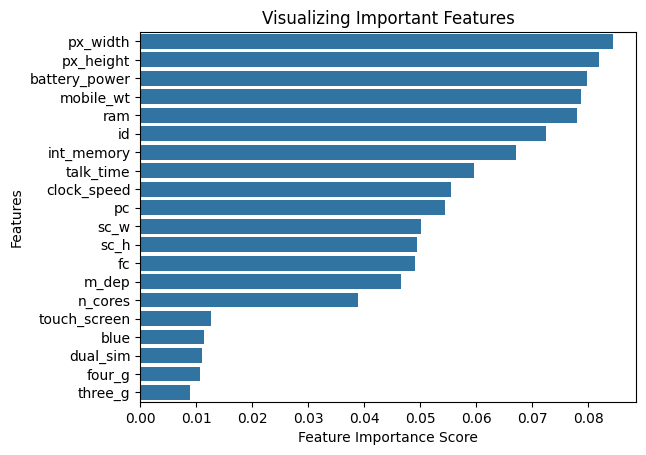

In [ ]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph

plt.show()


**XGBoost** (Extreme Gradient Boosting) is a popular and efficient machine learning algorithm used for both classification and regression tasks. It belongs to the family of gradient boosting algorithms, which build a strong predictive model by combining the predictions of multiple weak models, typically decision trees.

 The main idea is to combine many simple models, also known as “weak learners,” to create an ensemble model that is better at prediction.

In [ ]:
from xgboost import XGBClassifier

# Create an XGBClassifier
xgb_classifier = XGBClassifier()
# Train the model
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Model accuracy score with 10 decision-trees : 0.5212


<Axes: >

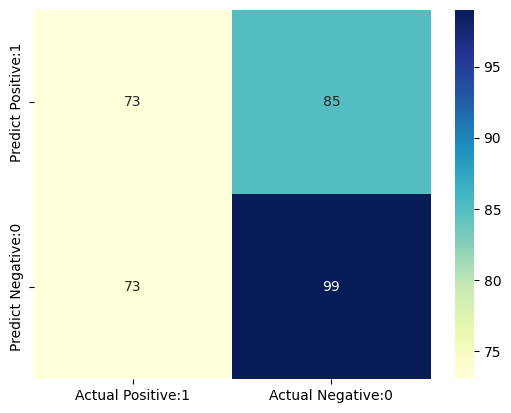

In [ ]:
y_pred =xgb_classifier.predict(X_test)


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')